<a href="https://colab.research.google.com/github/sushanttwayana/Text2HumanFace_Generation/blob/main/emotional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import h5py
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('/content/model.h5')


In [ ]:
loaded_model.summary()

Model: "DCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        1664      
                                                                 
 batchnorm_1 (BatchNormaliz  (None, 48, 48, 64)        256       
 ation)                                                          
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batchnorm_2 (BatchNormaliz  (None, 48, 48, 64)        256       
 ation)                                                          
                                                                 
 maxpool2d_1 (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0      

In [ ]:
from PIL import Image

# Load the image
image_path = '/content/download.jpg'  # Replace with your image file path
image = Image.open(image_path)


In [ ]:
# Resize the image to 48x48
resized_image = image.resize((48, 48))

# Convert the resized image to numpy array (optional)
import numpy as np
resized_image_array = np.array(resized_image)


In [ ]:
resized_image_gray = resized_image.convert('L')

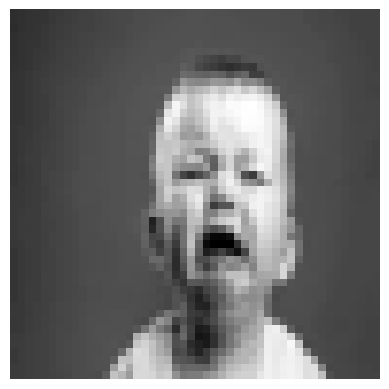

In [ ]:
import matplotlib.pyplot as plt

# Display the grayscale image using matplotlib
plt.imshow(resized_image_gray, cmap='gray')
plt.axis('off')  # Hide axes for better visualization
plt.show()

In [ ]:
# Convert the resized image to a format suitable for model input
import tensorflow as tf
resized_image_array = np.expand_dims(resized_image_gray, axis=0)  # Add batch dimension
resized_image_array = np.expand_dims(resized_image_array, axis=-1)  # Add channels dimension (for grayscale)
resized_image_array = resized_image_array.astype('float32') / 255.0  # Normalize pixel values



In [ ]:
# prediction and true labels
y_prob = loaded_model.predict(resized_image_array, batch_size=1, verbose=0)
y_pred = [np.argmax(prob) for prob in y_prob]

print(y_prob)
print(y_pred)

[[0.14415847 0.5209984  0.33484307]]
[1]


In [ ]:
mapper = {
    0: "happy",
    1: "sad",
    2: "neutral",
}

emo     = ["happy", 'sad', 'neutral']

# Using list comprehension to retrieve elements
result = [emo[idx] for idx in y_pred]

print(result)

['sad']
